In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# needs pandas < 1.3. I'm using pandas 1.2.5
#from pandas_profiling import ProfileReport
import phik
import warnings
warnings.filterwarnings('ignore')

import utils as ut

#sns.set_palette("pastel")
sns.set_theme(style="whitegrid", palette='pastel')

# Stroke Dataset

> https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
    
Attribute Information
1. `id`: unique identifier
2. `gender`: "Male", "Female" or "Other"
3. `age`: age of the patient
4. `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. `ever_married`: "No" or "Yes"
7. `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. `residence_type`: "Rural" or "Urban"
9. `avg_glucose_level`: average glucose level in blood
10. `bmi`: body mass index
11. `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. `stroke`: 1 if the patient had a stroke or 0 if not

> Note: "Unknown" in `smoking_status` means that the information is unavailable for this patient

### Data Cleaning

In [3]:
data_fn = './data/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(data_fn)

print('data size:', data.shape)
data.head()

data size: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
print('--> Quantity of samples with BMI > 50:', data[data['bmi'] > 50].shape[0])

--> Quantity of samples with BMI > 50: 79


In [3]:
# removing unknown cases of smoke...
data = data[data.smoking_status != 'Unknown']
# removing gender = Other...
data = data[data.gender != 'Other']
# and missing numbers of bmi
data.dropna(inplace=True)
data.set_index('id', inplace=True)

# According to Dr. Almekhlafi BMI is never greater than 50
data = data[data['bmi'] <= 50]

In [4]:
data.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3367 entries, 0 to 3366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3367 non-null   int64  
 1   gender             3367 non-null   object 
 2   age                3367 non-null   float64
 3   hypertension       3367 non-null   int64  
 4   heart_disease      3367 non-null   int64  
 5   ever_married       3367 non-null   object 
 6   work_type          3367 non-null   object 
 7   Residence_type     3367 non-null   object 
 8   avg_glucose_level  3367 non-null   float64
 9   bmi                3367 non-null   float64
 10  smoking_status     3367 non-null   object 
 11  stroke             3367 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 315.8+ KB


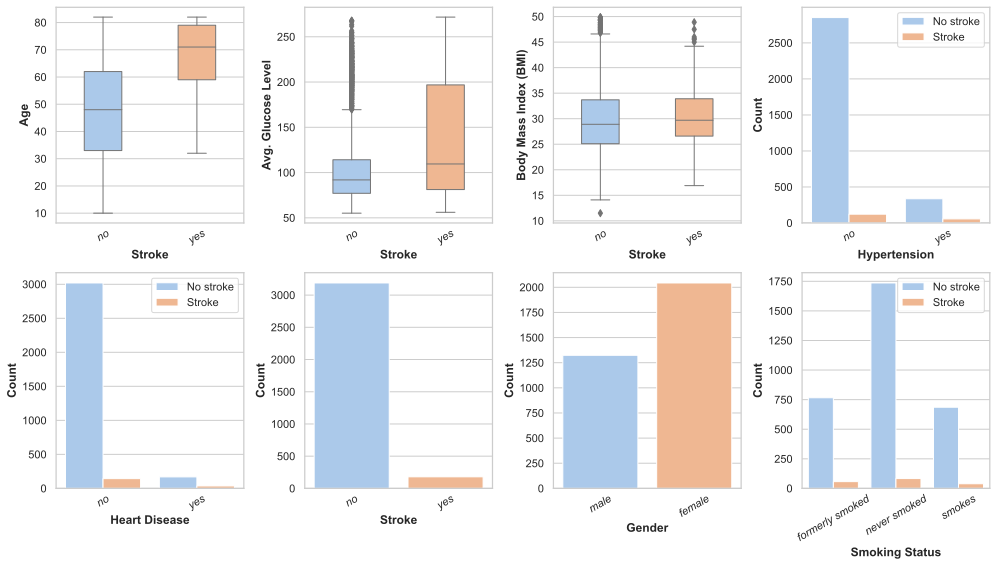

In [5]:
x_ax_dict = {'fontsize': 11, 'fontstyle': 'italic', 'verticalalignment':'center_baseline'}

plt.figure(figsize=(14,8))

# 'age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',  'stroke', 'gender', 'smoking_status', 

plt.subplot(2,4,1)
ax = sns.boxplot(data=data,  y='age', x='stroke', width=0.4, linewidth=1)
ax.set_xticklabels(["no", "yes"], rotation=30, fontdict=x_ax_dict)
plt.xlabel('Stroke', fontweight='bold')
plt.ylabel('Age', fontweight='bold')

plt.subplot(2,4,2)
ax = sns.boxplot(data=data,  y='avg_glucose_level', x='stroke', width=0.4, linewidth=1)
ax.set_xticklabels(["no", "yes"], rotation=30, fontdict=x_ax_dict)
plt.xlabel('Stroke', fontweight='bold')
plt.ylabel('Avg. Glucose Level', fontweight='bold')

plt.subplot(2,4,3)
ax = sns.boxplot(data=data,  y='bmi', x='stroke', width=0.4, linewidth=1);
ax.set_xticklabels(["no", "yes"], rotation=30, fontdict=x_ax_dict)
plt.xlabel('Stroke', fontweight='bold')
plt.ylabel('Body Mass Index (BMI)', fontweight='bold')

plt.subplot(2,4,4)
ax = sns.countplot(data=data,  x='hypertension', hue='stroke');
ax.set_xticklabels(["no", "yes"], rotation=30, fontdict=x_ax_dict)
plt.legend(['No stroke', 'Stroke'])
plt.xlabel('Hypertension', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.subplot(2,4,5)
ax = sns.countplot(data=data,  x='heart_disease', hue='stroke');
ax.set_xticklabels(["no", "yes"], rotation=30, fontdict=x_ax_dict)
plt.legend(['No stroke', 'Stroke'])
plt.xlabel('Heart Disease', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.subplot(2,4,6)
ax = sns.countplot(data=data,  x='stroke');
ax.set_xticklabels(["no", "yes"], rotation=30, fontdict=x_ax_dict)
plt.xlabel('Stroke', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.subplot(2,4,7)
ax = sns.countplot(data=data,  x='gender');
ax.set_xticklabels(["male", "female"], rotation=30, fontdict=x_ax_dict)
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.subplot(2,4,8)
ax = sns.countplot(data=data,  x='smoking_status', hue='stroke')
ax.set_xticklabels(['formerly smoked', 'never smoked', 'smokes'], rotation=30, fontdict=x_ax_dict)
plt.xlabel('Smoking Status', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(['No stroke', 'Stroke'])

plt.tight_layout()
plt.savefig('output/initial_data.png', dpi=300)

In [6]:
# removing ID column
#data.drop(columns=['id'], inplace=True)
data.to_csv('./data/stroke_clean_data.csv')

#### Profiling

In [7]:
#profile = ProfileReport(data)

In [8]:
#profile.to_widgets()

In [9]:
#profile.to_file(output_file='output/healthcare-dataset-stroke.html')

## Correlations
 > Not compatible with Pandas >= 1.3

In [10]:
# selecting relevant columns according to Dr. Almekhlafi
nodes = ['age', 'bmi', 'smoking_status',
         'avg_glucose_level', 'hypertension',
         'heart_disease', 'stroke']

data2 = data[nodes].copy()
data2.head()

,age,bmi,smoking_status,avg_glucose_level,hypertension,heart_disease,stroke
id,,,,,,,
9046,67.0,36.6,formerly smoked,228.69,0,1,1
31112,80.0,32.5,never smoked,105.92,0,1,1
60182,49.0,34.4,smokes,171.23,0,0,1
1665,79.0,24.0,never smoked,174.12,1,0,1
56669,81.0,29.0,formerly smoked,186.21,0,0,1


### Pearson

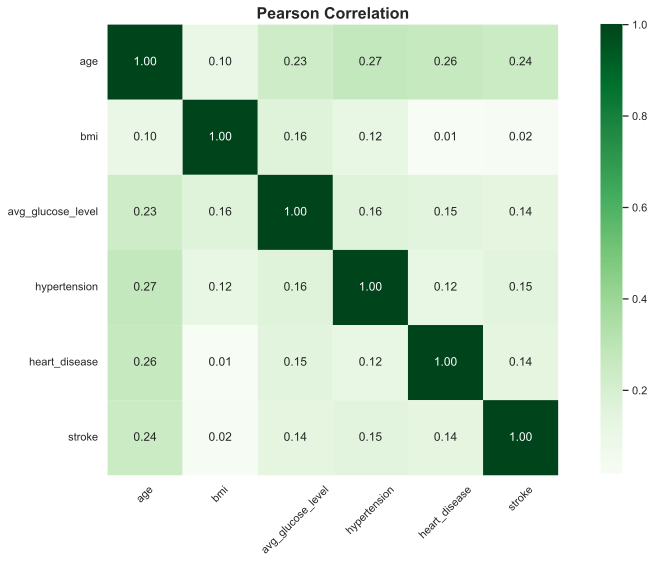

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data2.corr(method='pearson'), annot=True, fmt='.2f', cmap='Greens', square=True)
plt.xticks(rotation=45)
plt.title('Pearson Correlation', fontdict={'weight':'bold', 'size':16})
plt.tight_layout()
plt.savefig('output/pearson_corr.png', dpi=150)

### $\Phi$K

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


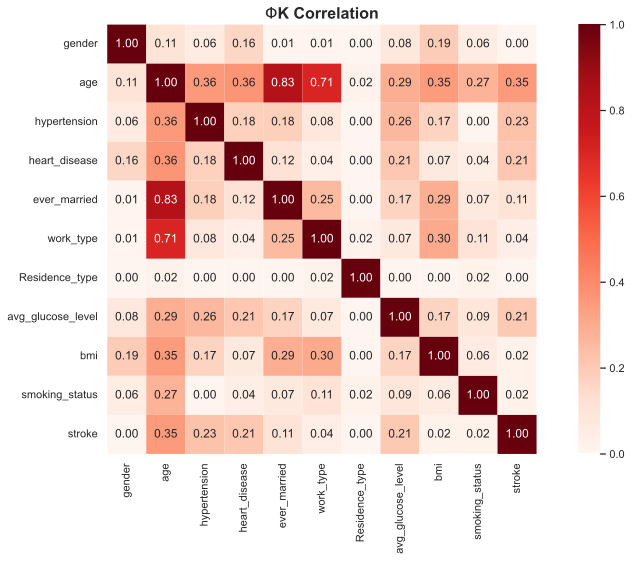

In [12]:

phik_res = data.phik_matrix();

plt.figure(figsize=(12,8))
sns.heatmap(phik_res, annot=True, fmt='.2f', cmap='Reds', square=True);
plt.title('$\Phi$K Correlation', fontdict={'weight':'bold', 'size':16})
plt.tight_layout()
plt.savefig('output/phik_corr.png', dpi=150)

### Granger Causality

In [13]:
# removing categorical data
data_num = data.drop(labels=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], 
                      axis='columns')
#data_num

#### Granger causality calculation

In [14]:
causality_mtx = ut.gcausality_matrix(data_num)
#causality_mtx

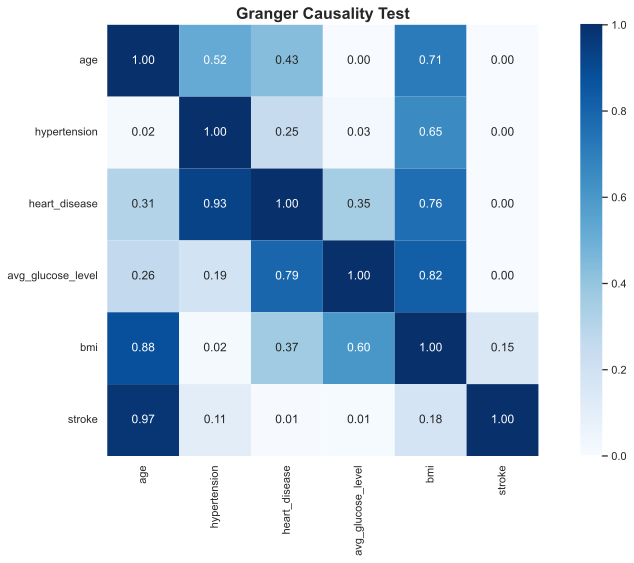

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(causality_mtx, annot=True, fmt='.2f', cmap='Blues', square=True)
plt.title('Granger Causality Test', fontdict={'weight':'bold', 'size':16})
plt.tight_layout()
#plt.savefig('output/phik_res_plot.png', dpi=150)